In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib.colors as colors
from urllib.request import urlopen
import pathlib
import os
from tempfile import NamedTemporaryFile

In [2]:
# Datos sacados de https://www.servel.cl/total-de-afiliados-a-partidos-politicos-por-sexo/
path = 'data/afiliados_partidos_politicos.csv'
df = pd.read_csv(path)
df.head()

,Partido,Mujeres,Hombres
0,CIUDADANOS,10712,8612
1,COMUNISTA DE CHILE,39748,44754
2,CONVERGENCIA SOCIAL,2076,1981
3,DEMOCRATA CRISTIANO,51803,55809
4,ECOLOGISTA VERDE,8771,7641


In [3]:
df['Partido'] = df['Partido'].str.title()
df['Total'] = df['Mujeres'] + df['Hombres']
df['Mujeres (%)'] = df['Mujeres'] / df['Total'] * 100
df['Hombres (%)'] = df['Hombres'] / df['Total'] * 100
df.set_index('Partido', inplace=True)
df.head()

,Mujeres,Hombres,Total,Mujeres (%),Hombres (%)
Partido,,,,,
Ciudadanos,10712,8612,19324,55.433658,44.566342
Comunista De Chile,39748,44754,84502,47.037940,52.962060
Convergencia Social,2076,1981,4057,51.170816,48.829184
Democrata Cristiano,51803,55809,107612,48.138683,51.861317
Ecologista Verde,8771,7641,16412,53.442603,46.557397


In [4]:
# FONTS
roboto_url = 'https://github.com/google/roboto/blob/master/src/hinted/Roboto-Regular.ttf'
lato_url = 'https://github.com/google/fonts/blob/master/ofl/lato/Lato-Regular.ttf'
font_file = '?raw=true'
roboto_url = roboto_url + font_file  # You want the actual file, not some html
lato_url = lato_url + font_file

response = urlopen(roboto_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
roboto = fm.FontProperties(fname=f.name)

response = urlopen(lato_url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
lato = fm.FontProperties(fname=f.name)

In [5]:
fontsize=12

def hide_border(ax, xlabel, ylabel):
    ax.set_xlabel(xlabel, fontproperties=roboto, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontproperties=roboto, fontsize=fontsize)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     ax.yaxis.set_ticks_position('left')
#     ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_ticks([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.title.set_position([.3, 1.03])

In [6]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': fontsize,
         'axes.titlesize': fontsize,
         'xtick.labelsize': fontsize,
         'ytick.labelsize': fontsize}
plt.rcParams.update(params)

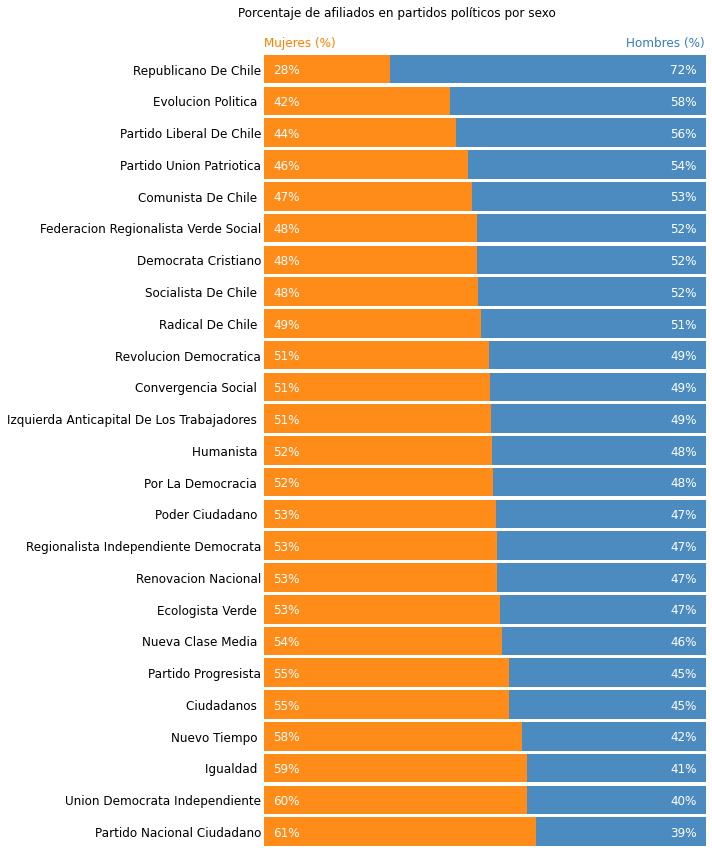

In [7]:

percents = ['Mujeres (%)', 'Hombres (%)']
colors = ['#ff7f00', '#377eb8']
title = "Porcentaje de afiliados en partidos políticos por sexo"
df_sorted = df[percents].sort_values(by = percents[0], ascending = False) 
ax = df_sorted.plot.barh(stacked=True, figsize=(10,12), legend=False, width=0.9,
                         alpha=0.9, xlim=(0,100), color=colors)
ax.set_title(title)
ax.text(0, df_sorted.shape[0]-0.3, percents[0], color=colors[0], fontsize=fontsize)
ax.text(82, df_sorted.shape[0]-0.3, percents[1], color=colors[1], fontsize=fontsize)

hide_border(ax, "", "")

for p in ax.patches:
    if p.xy[0] == 0:
        xpos = 2
    else:
        xpos = 92
    ax.annotate(str(int(round(p.get_width()))) + "%", (xpos, p.xy[1]+0.3), color='white', fontsize=fontsize)

    
plt.tight_layout()
figname = title.replace(' ', '_').lower()
plt.savefig("figs/" + figname + ".png", dpi=200)
plt.show()
plt.close()